In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix,roc_curve,auc

In [108]:
data=pd.read_csv("Fraud.csv")

In [109]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [110]:
data.shape

(6362620, 11)

In [111]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [112]:
data[data.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [113]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
step,6362620.00000,243.39725,142.33197,1.00000,156.00000,239.00000,335.00000,743.00000
amount,6362620.00000,179861.90355,603858.23146,0.00000,13389.57000,74871.94000,208721.47750,92445516.64000
oldbalanceOrg,6362620.00000,833883.10407,2888242.67304,0.00000,0.00000,14208.00000,107315.17500,59585040.37000
newbalanceOrig,6362620.00000,855113.66858,2924048.50295,0.00000,0.00000,0.00000,144258.41000,49585040.37000
oldbalanceDest,6362620.00000,1100701.66652,3399180.11299,0.00000,0.00000,132705.66500,943036.70750,356015889.35000
newbalanceDest,6362620.00000,1224996.39820,3674128.94212,0.00000,0.00000,214661.44000,1111909.25000,356179278.92000
isFraud,6362620.00000,0.00129,0.03590,0.00000,0.00000,0.00000,0.00000,1.00000
isFlaggedFraud,6362620.00000,0.00000,0.00159,0.00000,0.00000,0.00000,0.00000,1.00000


In [114]:
dummies_type=pd.get_dummies(data['type'],drop_first=True)
dummies_type.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [115]:
data.drop(columns=['nameOrig','type','nameDest','isFlaggedFraud'],inplace=True)

In [116]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,181.00,181.00,0.00,0.00,0.00,1
3,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1


In [117]:
data['balance_diff_Org']=data['oldbalanceOrg']-data['newbalanceOrig']

In [118]:
data['balance_diff_Dest']=data['newbalanceDest']-data['oldbalanceDest']

In [119]:
final_df=pd.concat([data,dummies_type],axis=1)

In [120]:
final_df.head(500)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_diff_Org,balance_diff_Dest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,181.00,-21182.00,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,160347.32,7965270.68,8125617.99,724867.22,1517262.16,0,-160347.31,792394.94,0,0,0,0
496,1,289272.75,8125617.99,8414890.75,413976.60,31469.78,0,-289272.76,-382506.82,0,0,0,0
497,1,63189.26,8414890.75,8478080.00,101925.00,0.00,0,-63189.25,-101925.00,0,0,0,0
498,1,196725.32,8478080.00,8674805.32,2248012.90,3940085.21,0,-196725.32,1692072.31,0,0,0,0


In [106]:
#final_df['isFraudTarget']=final_df['amount'].apply(lambda x: 1 if x>=200.000 else 0)
#final_df.head(5)

In [103]:
#final_df['isFraudTarget']=final_df.loc[final_df['amount']>=final_df['oldbalanceOrg']]=1
#final_df.head(5)

In [104]:
#final_df['isFraudTarget']=final_df.loc[final_df['amount']<final_df['balance_diff_Org']]=1
#final_df.head(5)

In [121]:
final_df.isnull().sum()

step                 0
amount               0
oldbalanceOrg        0
newbalanceOrig       0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
balance_diff_Org     0
balance_diff_Dest    0
CASH_OUT             0
DEBIT                0
PAYMENT              0
TRANSFER             0
dtype: int64

In [122]:
target = 'isFraud'

In [123]:
X=final_df.drop(['isFraud'],axis=1)
y=final_df['isFraud']

In [124]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balance_diff_Org,balance_diff_Dest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,9839.64,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,1864.28,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,181.00,0.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,181.00,-21182.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,11668.14,0.0,0,0,1,0


In [125]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

0    6354407
1       8213
Name: isFraud, dtype: int64


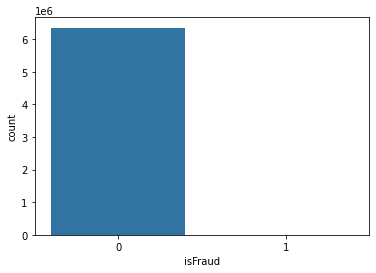

In [127]:
ax = sns.countplot(x=target,data=final_df)
print(final_df[target].value_counts())


In [128]:
100* (492/float(data.shape[0]))

0.0077326635882702405

In [80]:
100* (284315/float(data.shape[0]))

1995.6131115322523

In [129]:
Y_train.value_counts()

0    4257408
1       5547
Name: isFraud, dtype: int64

In [130]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [177]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
Y_Test_Pred = clf.predict(X_test)

In [180]:
print(classification_report(Y_test,Y_Test_Pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2689
           1       0.90      0.90      0.90      2732

    accuracy                           0.90      5421
   macro avg       0.90      0.90      0.90      5421
weighted avg       0.90      0.90      0.90      5421



In [133]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,690821,677
1,1014,0


In [134]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [135]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.99834068768113
Precision =  0.37040557667934093
Recall =  0.4384846211552888
F1 Score =  0.40158021298522845


In [136]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

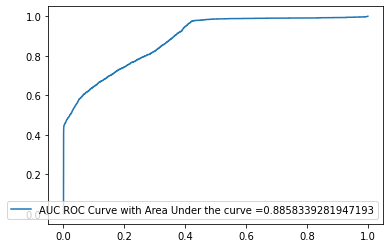

In [137]:
generate_auc_roc_curve(clf, X_test)

#UNDERSAMPLING

In [138]:
minority_class_len = len(final_df[final_df[target] == 1])
print(minority_class_len)

8213


In [139]:
majority_class_indices = final_df[final_df[target] == 0].index
print(majority_class_indices)

Int64Index([      0,       1,       4,       5,       6,       7,       8,
                  9,      10,      11,
            ...
            6362314, 6362315, 6362316, 6362317, 6362318, 6362319, 6362320,
            6362321, 6362322, 6362323],
           dtype='int64', length=6354407)


In [140]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=True)
print(len(random_majority_indices))

8213


In [141]:
minority_class_indices = final_df[final_df[target] == 1].index
print(minority_class_indices)

Int64Index([      2,       3,     251,     252,     680,     681,     724,
                969,     970,    1115,
            ...
            6362610, 6362611, 6362612, 6362613, 6362614, 6362615, 6362616,
            6362617, 6362618, 6362619],
           dtype='int64', length=8213)


In [142]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [145]:
under_sample = final_df.loc[under_sample_indices]

In [146]:
minority_class_len = len(final_df[final_df[target] == 1])
print(minority_class_len)

8213


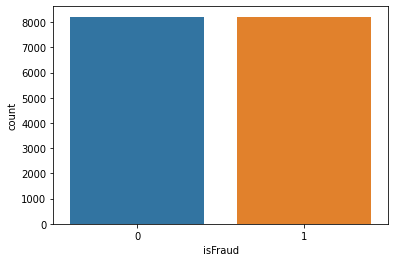

In [147]:
sns.countplot(x=target, data=under_sample)

In [148]:
X = under_sample.loc[:, final_df.columns!=target]
Y = under_sample.loc[:, final_df.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [152]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8976203652462645
Precision =  0.8965391621129326
Recall =  0.900805270863836
F1 Score =  0.8986671535512142


In [150]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

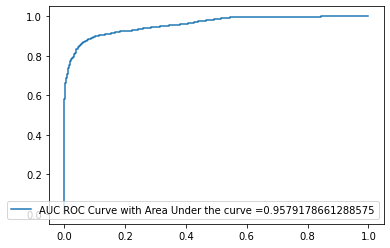

In [151]:
generate_auc_roc_curve(clf, X_test)

#RandomForestClassifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [156]:
if True:
    probabilities = clf.fit(X_train, Y_train.values.ravel()).predict(X_test)

In [157]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(Y_test,probabilities))

0.9883906945559753


In [182]:
generate_model_report(Y_test, probabilities)

Accuracy =  0.9928057553956835
Precision =  0.990885891359825
Recall =  0.9948755490483162
F1 Score =  0.9928767123287671


In [158]:
print(classification_report(Y_test,probabilities))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2689
           1       0.99      0.99      0.99      2732

    accuracy                           0.99      5421
   macro avg       0.99      0.99      0.99      5421
weighted avg       0.99      0.99      0.99      5421



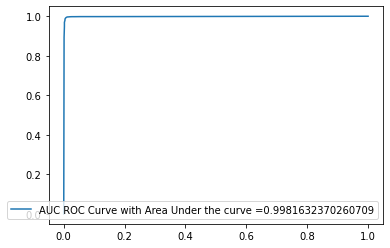

In [159]:
generate_auc_roc_curve(clf, X_test)

### DecisionTreeClassifier

In [173]:
from sklearn.tree import  DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [175]:
model2.fit(X_train,Y_train)
y_pred1=model2.predict(X_test)

In [183]:
generate_model_report(Y_test, y_pred1)

Accuracy =  0.9730676996864047
Precision =  0.9572135785007072
Recall =  0.9908491947291361
F1 Score =  0.9737410071942446


In [176]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2689
           1       0.96      0.99      0.97      2732

    accuracy                           0.97      5421
   macro avg       0.97      0.97      0.97      5421
weighted avg       0.97      0.97      0.97      5421



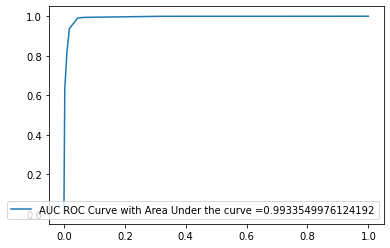

In [181]:
generate_auc_roc_curve(model2, X_test)

# CONCLUSION

#1.LOGISTIC REGRESSION


In [ ]:
#Accuracy =  0.8976203652462645
#Precision =  0.8965391621129326
#Recall =  0.900805270863836
#F1 Score =  0.8986671535512142

#2.RandomForestClassifier

In [ ]:
#Accuracy =  0.9928057553956835
#Precision =  0.990885891359825
#Recall =  0.9948755490483162
#F1 Score =  0.9928767123287671

#3.DecisionTreeClassifier

In [ ]:
#Accuracy =  0.9730676996864047
#Precision =  0.9572135785007072
#Recall =  0.9908491947291361
#F1 Score =  0.9737410071942446